# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

https://github.com/ultralytics/yolov5

# Lable by 

https://roboflow.com/

In [ ]:
!pip install PyYAML

In [ ]:
!nvidia-smi

Fri Mar  4 15:04:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images
from yolov5 import utils
display = utils.notebook_init()  # checks

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 11162, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 11162 (delta 0), reused 4 (delta 0), pack-reused 11158
Receiving objects: 100% (11162/11162), 11.16 MiB | 12.75 MiB/s, done.
Resolving deltas: 100% (7708/7708), done.
/content/yolov5
     |████████████████████████████████| 596 kB 13.1 MB/s 
     |████████████████████████████████| 145 kB 16.5 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 138 kB 50.8 MB/s 
     |████████████████████████████████| 1.1 MB 41.7 MB/s 
     |████████████████████████████████| 178 kB 49.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="3m3CAjReHFawvohIpsB4")
project = rf.workspace("tuchsanai").project("catmonkey")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to catmonkey-1 in yolov5pytorch:: 100%|██████████| 48/48 [00:00<00:00, 1736.50it/s]


In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/catmonkey-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

file = "/content/yolov5/catmonkey-1/train/images/cats_024_jpg.rf.75250e350e8047d0950c930ba1776c92.jpg"

img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

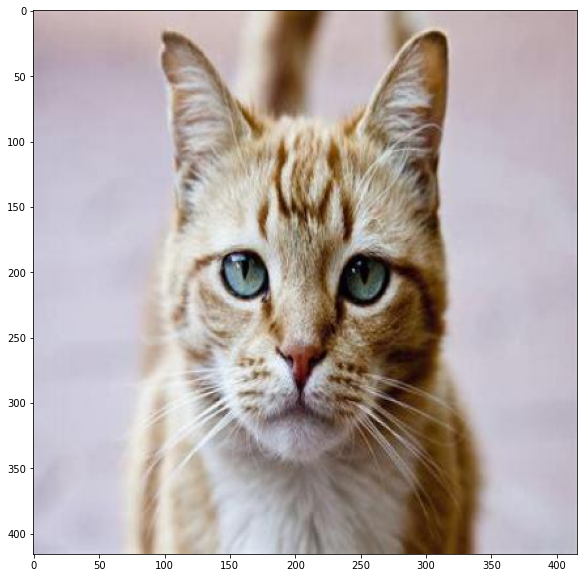

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
img

array([[[210, 189, 194],
        [208, 187, 192],
        [205, 184, 189],
        ...,
        [191, 170, 175],
        [193, 172, 177],
        [195, 174, 179]],

       [[209, 188, 193],
        [206, 185, 190],
        [204, 183, 188],
        ...,
        [190, 169, 174],
        [192, 171, 176],
        [194, 173, 178]],

       [[207, 186, 191],
        [204, 183, 188],
        [201, 180, 185],
        ...,
        [189, 168, 173],
        [191, 170, 175],
        [193, 172, 177]],

       ...,

       [[194, 191, 210],
        [192, 189, 208],
        [191, 188, 207],
        ...,
        [192, 192, 202],
        [194, 194, 204],
        [195, 195, 205]],

       [[195, 192, 211],
        [193, 190, 209],
        [191, 188, 207],
        ...,
        [194, 194, 204],
        [196, 196, 206],
        [197, 197, 207]],

       [[195, 192, 211],
        [193, 190, 209],
        [192, 189, 208],
        ...,
        [195, 195, 205],
        [197, 197, 207],
        [198, 198, 208]]

In [ ]:
from hubconf import *

In [ ]:

model = custom(path='/content/yolov5/runs/train/exp/weights/last.pt')

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:

model = torch.hub.load('/content/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/last.pt', source='local') 

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
results1 = model(img)
df1 = results1.pandas().xyxy[0]

df1

,xmin,ymin,xmax,ymax,confidence,class,name


,xmin,ymin,xmax,ymax,confidence,class,name


detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/yolov5/catmonkey-1/train/images/cats_024_jpg.rf.75250e350e8047d0950c930ba1776c92.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/catmonkey-1/train/images/cats_024_jpg.rf.75250e350e8047d0950c930ba1776c92.jpg: 640x640 Done. (0.034s)
Speed: 0.8ms pre-process, 33.8ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


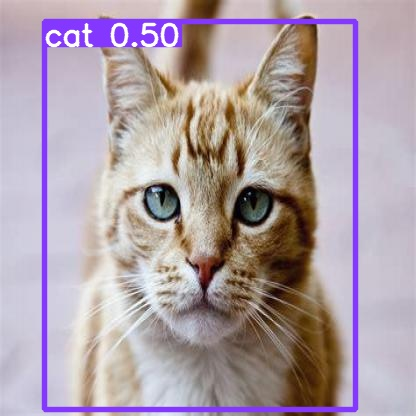

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/last.pt' --img 640 --conf 0.25 --source {file}
display.Image(filename=f'/content/yolov5/runs/detect/exp/cats_024_jpg.rf.75250e350e8047d0950c930ba1776c92.jpg', width=600)

In [ ]:
file

'/content/yolov5/catmonkey-1/train/images/cats_024_jpg.rf.75250e350e8047d0950c930ba1776c92.jpg'